In [80]:
import pandas as pd #Data Analysis and manipulation tool
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
# Read raw file from the web
df = pd.read_csv('../data/interim/df_4_1_without_direct_to_icu.csv', index_col=0)
pd.set_option('max_columns', df.shape[1]) #Adjust the plotting visualizationto make all columns visible in a plot
df.head()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                         0            1          60th       0   
1                         2            0          10th       0   
2                         3            0          40th       1   
3                         4            0          10th       0   
4                         5            0          10th       0   

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                 0.0                 1.0                 1.0  0.0   
1                 0.0                 0.0                 0.0  0.0   
2                 0.0                 0.0                 0.0  0.0   
3                 0.0                 0.0                 0.0  0.0   
4                 0.0                 0.0                 0.0  0.0   

   IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  BE_ARTERIAL_MEDIAN  \
0                0.0    1.0        0.605263                -1.0   
1                0.0    1.0        0.605263                -1.0   
2                1.0    1.0       -0.263158                -1.0   
3                0.0    1.0        0.605263                -1.0   
4                0.0    1.0        0.605263                -1.0   

   BE_VENOUS_MEDIAN  BIC_ARTERIAL_MEDIAN  BIC_VENOUS_MEDIAN  \
0              -1.0            -0.317073          -0.317073   
1              -1.0            -0.317073          -0.317073   
2              -1.0            -0.317073          -0.317073   
3              -1.0            -0.317073          -0.317073   
4              -1.0            -0.317073          -0.317073   

   BILLIRUBIN_MEDIAN  BLAST_MEDIAN  CALCIUM_MEDIAN  CREATININ_MEDIAN  \
0          -0.938950          -1.0        0.183673         -0.868365   
1          -0.938950          -1.0        0.357143         -0.912243   
2          -0.972789          -1.0        0.326531         -0.968861   
3          -0.935113          -1.0        0.357143         -0.913659   
4          -0.938950          -1.0        0.357143         -0.891012   

   FFA_MEDIAN  GGT_MEDIAN  GLUCOSE_MEDIAN  HEMATOCRITE_MEDIAN  \
0   -0.742004   -0.945093       -0.891993            0.090147   
1   -0.742004   -0.958528       -0.780261            0.144654   
2   -0.194030   -0.316589       -0.891993           -0.203354   
3   -0.829424   -0.938084       -0.851024            0.358491   
4   -0.742004   -0.958528       -0.891993            0.291405   

   HEMOGLOBIN_MEDIAN  INR_MEDIAN  LACTATE_MEDIAN  LEUKOCYTES_MEDIAN  \
0           0.109756   -0.932246        1.000000          -0.835844   
1           0.158537   -0.959849        1.000000          -0.382773   
2          -0.219512   -0.959849       -0.828421          -0.729239   
3           0.304878   -0.959849        1.000000          -0.702202   
4           0.243902   -0.959849        1.000000          -0.706450   

   LINFOCITOS_MEDIAN  NEUTROPHILES_MEDIAN  P02_ARTERIAL_MEDIAN  \
0          -0.914938            -0.868747            -0.170732   
1          -0.908714            -0.412965            -0.170732   
2          -0.836100            -0.784714            -0.170732   
3          -0.641079            -0.812725            -0.170732   
4          -0.340249            -0.846339            -0.170732   

   P02_VENOUS_MEDIAN  PC02_ARTERIAL_MEDIAN  PC02_VENOUS_MEDIAN  PCR_MEDIAN  \
0          -0.704142              -0.77931           -0.754601   -0.875236   
1          -0.704142              -0.77931           -0.754601   -0.939887   
2          -0.633136              -0.77931           -0.779141   -0.503592   
3          -0.704142              -0.77931          

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 350
Data columns (total 86 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PATIENT_VISIT_IDENTIFIER          351 non-null    int64  
 1   AGE_ABOVE65                       351 non-null    int64  
 2   AGE_PERCENTIL                     351 non-null    object 
 3   GENDER                            351 non-null    int64  
 4   DISEASE GROUPING 1                351 non-null    float64
 5   DISEASE GROUPING 2                351 non-null    float64
 6   DISEASE GROUPING 3                351 non-null    float64
 7   DISEASE GROUPING 4                351 non-null    float64
 8   DISEASE GROUPING 5                351 non-null    float64
 9   DISEASE GROUPING 6                351 non-null    float64
 10  HTN                               351 non-null    float64
 11  IMMUNOCOMPROMISED                 351 non-null    float64
 12  OTHER   

In [83]:
df.shape

(351, 86)

<AxesSubplot:>

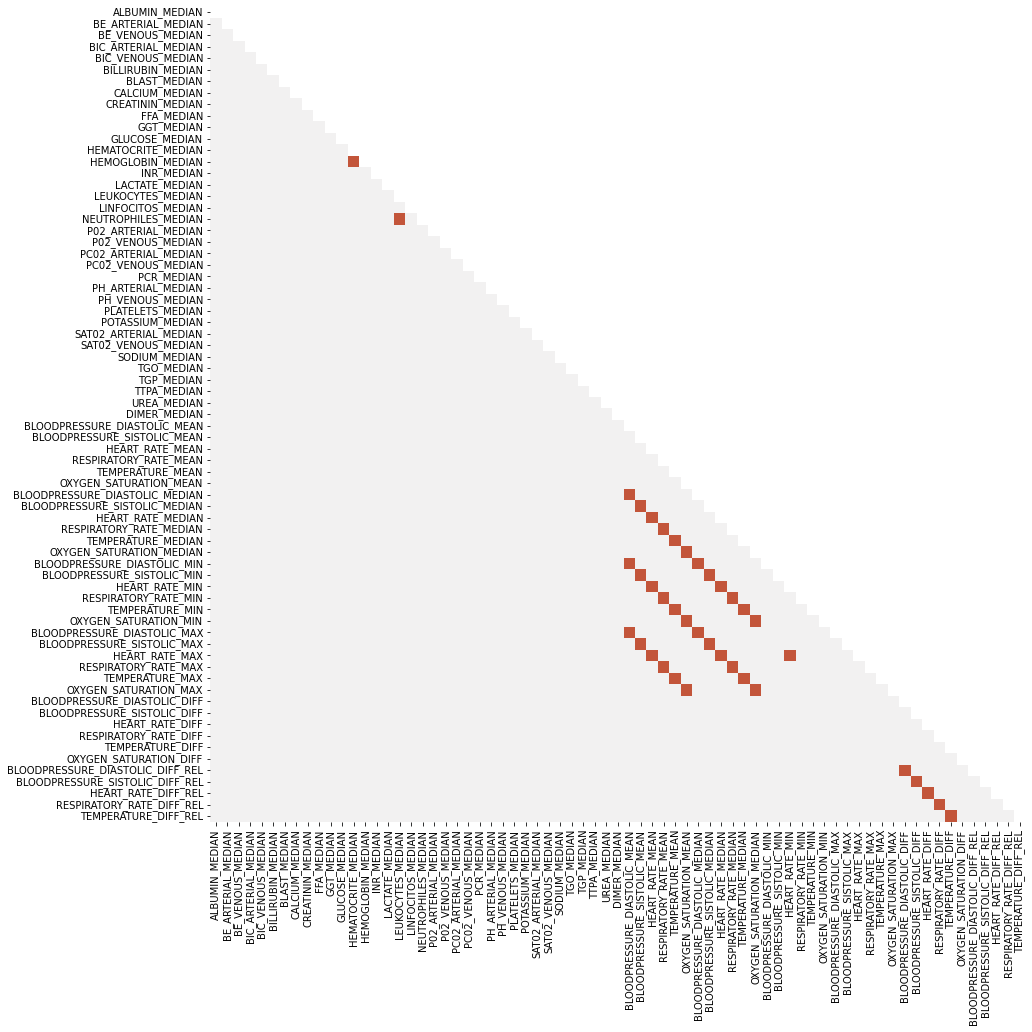

In [84]:
# Compute the correlation matrix
corr = df.iloc[:,13:-2].corr().abs()
masked_corr = corr
masked_corr[corr <= 0.9] = 0
masked_corr[corr > 0.9] = 1

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.heatmap(masked_corr, mask=mask, cmap=cmap, center=0, square=True, vmin=0, vmax=1.0, cbar=False)

In [89]:
upper_tri = masked_corr.where(np.triu(np.ones(masked_corr.shape),k=1).astype(np.bool))
correlated = []
for i in range(upper_tri.shape[0]):
    for j in range(upper_tri.shape[0]):
        if upper_tri.iloc[i,j] > 0.9:
            print(f'{upper_tri.index[i]} x {upper_tri.columns[j]}')
            correlated.append([upper_tri.index[i], upper_tri.columns[j]])

HEMATOCRITE_MEDIAN x HEMOGLOBIN_MEDIAN
LEUKOCYTES_MEDIAN x NEUTROPHILES_MEDIAN
BLOODPRESSURE_DIASTOLIC_MEAN x BLOODPRESSURE_DIASTOLIC_MEDIAN
BLOODPRESSURE_DIASTOLIC_MEAN x BLOODPRESSURE_DIASTOLIC_MIN
BLOODPRESSURE_DIASTOLIC_MEAN x BLOODPRESSURE_DIASTOLIC_MAX
BLOODPRESSURE_SISTOLIC_MEAN x BLOODPRESSURE_SISTOLIC_MEDIAN
BLOODPRESSURE_SISTOLIC_MEAN x BLOODPRESSURE_SISTOLIC_MIN
BLOODPRESSURE_SISTOLIC_MEAN x BLOODPRESSURE_SISTOLIC_MAX
HEART_RATE_MEAN x HEART_RATE_MEDIAN
HEART_RATE_MEAN x HEART_RATE_MIN
HEART_RATE_MEAN x HEART_RATE_MAX
RESPIRATORY_RATE_MEAN x RESPIRATORY_RATE_MEDIAN
RESPIRATORY_RATE_MEAN x RESPIRATORY_RATE_MIN
RESPIRATORY_RATE_MEAN x RESPIRATORY_RATE_MAX
TEMPERATURE_MEAN x TEMPERATURE_MEDIAN
TEMPERATURE_MEAN x TEMPERATURE_MIN
TEMPERATURE_MEAN x TEMPERATURE_MAX
OXYGEN_SATURATION_MEAN x OXYGEN_SATURATION_MEDIAN
OXYGEN_SATURATION_MEAN x OXYGEN_SATURATION_MIN
OXYGEN_SATURATION_MEAN x OXYGEN_SATURATION_MAX
BLOODPRESSURE_DIASTOLIC_MEDIAN x BLOODPRESSURE_DIASTOLIC_MIN
BLOODPRESSURE_

<ipython-input-89-a39bd96f7e2b>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = masked_corr.where(np.triu(np.ones(masked_corr.shape),k=1).astype(np.bool))


-- **Criar visualização da correlação**

In [90]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

In [91]:
to_drop

['HEMOGLOBIN_MEDIAN',
 'NEUTROPHILES_MEDIAN',
 'BLOODPRESSURE_DIASTOLIC_MEDIAN',
 'BLOODPRESSURE_SISTOLIC_MEDIAN',
 'HEART_RATE_MEDIAN',
 'RESPIRATORY_RATE_MEDIAN',
 'TEMPERATURE_MEDIAN',
 'OXYGEN_SATURATION_MEDIAN',
 'BLOODPRESSURE_DIASTOLIC_MIN',
 'BLOODPRESSURE_SISTOLIC_MIN',
 'HEART_RATE_MIN',
 'RESPIRATORY_RATE_MIN',
 'TEMPERATURE_MIN',
 'OXYGEN_SATURATION_MIN',
 'BLOODPRESSURE_DIASTOLIC_MAX',
 'BLOODPRESSURE_SISTOLIC_MAX',
 'HEART_RATE_MAX',
 'RESPIRATORY_RATE_MAX',
 'TEMPERATURE_MAX',
 'OXYGEN_SATURATION_MAX',
 'BLOODPRESSURE_DIASTOLIC_DIFF_REL',
 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
 'HEART_RATE_DIFF_REL',
 'RESPIRATORY_RATE_DIFF_REL',
 'TEMPERATURE_DIFF_REL']

In [92]:
df1 = df.drop(to_drop, axis=1)

In [93]:
df1.shape

(351, 61)

In [94]:
df1.head()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                         0            1          60th       0   
1                         2            0          10th       0   
2                         3            0          40th       1   
3                         4            0          10th       0   
4                         5            0          10th       0   

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                 0.0                 1.0                 1.0  0.0   
1                 0.0                 0.0                 0.0  0.0   
2                 0.0                 0.0                 0.0  0.0   
3                 0.0                 0.0                 0.0  0.0   
4                 0.0                 0.0                 0.0  0.0   

   IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  BE_ARTERIAL_MEDIAN  \
0                0.0    1.0        0.605263                -1.0   
1                0.0    1.0        0.605263                -1.0   
2                1.0    1.0       -0.263158                -1.0   
3                0.0    1.0        0.605263                -1.0   
4                0.0    1.0        0.605263                -1.0   

   BE_VENOUS_MEDIAN  BIC_ARTERIAL_MEDIAN  BIC_VENOUS_MEDIAN  \
0              -1.0            -0.317073          -0.317073   
1              -1.0            -0.317073          -0.317073   
2              -1.0            -0.317073          -0.317073   
3              -1.0            -0.317073          -0.317073   
4              -1.0            -0.317073          -0.317073   

   BILLIRUBIN_MEDIAN  BLAST_MEDIAN  CALCIUM_MEDIAN  CREATININ_MEDIAN  \
0          -0.938950          -1.0        0.183673         -0.868365   
1          -0.938950          -1.0        0.357143         -0.912243   
2          -0.972789          -1.0        0.326531         -0.968861   
3          -0.935113          -1.0        0.357143         -0.913659   
4          -0.938950          -1.0        0.357143         -0.891012   

   FFA_MEDIAN  GGT_MEDIAN  GLUCOSE_MEDIAN  HEMATOCRITE_MEDIAN  INR_MEDIAN  \
0   -0.742004   -0.945093       -0.891993            0.090147   -0.932246   
1   -0.742004   -0.958528       -0.780261            0.144654   -0.959849   
2   -0.194030   -0.316589       -0.891993           -0.203354   -0.959849   
3   -0.829424   -0.938084       -0.851024            0.358491   -0.959849   
4   -0.742004   -0.958528       -0.891993            0.291405   -0.959849   

   LACTATE_MEDIAN  LEUKOCYTES_MEDIAN  LINFOCITOS_MEDIAN  P02_ARTERIAL_MEDIAN  \
0        1.000000          -0.835844          -0.914938            -0.170732   
1        1.000000          -0.382773          -0.908714            -0.170732   
2       -0.828421          -0.729239          -0.836100            -0.170732   
3        1.000000          -0.702202          -0.641079            -0.170732   
4        1.000000          -0.706450          -0.340249            -0.170732   

   P02_VENOUS_MEDIAN  PC02_ARTERIAL_MEDIAN  PC02_VENOUS_MEDIAN  PCR_MEDIAN  \
0          -0.704142              -0.77931           -0.754601   -0.875236   
1          -0.704142              -0.77931           -0.754601   -0.939887   
2          -0.633136              -0.77931           -0.779141   -0.503592   
3          -0.704142              -0.77931           -0.754601   -0.990926   
4          -0.704142              -0.77931           -0.754601   -0.997732   

   PH_ARTERIAL_MEDIAN  PH_VENOUS_MEDIAN  PLATELETS_MEDIAN  POTASSIUM_MEDIAN  \
0            0.234043          0.363636         -0.540721         -0.518519   
1       

In [95]:
def normalization_minus_one_to_one(serie: pd.Series) -> pd.Series:
    '''
    '''
    return 2.0 * (serie - np.min(serie)) / np.ptp(serie) - 1

In [96]:
def scale_age_percentil(age_percentil:pd.Series)-> pd.Series:
    '''
    '''
    
    age_percentil_float = (age_percentil.str.replace('th', '').replace('Above 90', '100').astype('float64'))-10
    
    
    return normalization_minus_one_to_one(age_percentil_float)

In [97]:
df1['AGE_PERCENTIL'] = scale_age_percentil(df1['AGE_PERCENTIL'])
df1['AGE_PERCENTIL']

0      0.111111
1     -1.000000
2     -0.333333
3     -1.000000
4     -1.000000
         ...   
346   -0.333333
347    1.000000
348   -0.111111
349   -0.333333
350   -0.111111
Name: AGE_PERCENTIL, Length: 351, dtype: float64

In [98]:
df1.to_csv('../data/processed/processed_data.csv')